In [1]:
from sympy import *

# 001 Symbols

In [41]:
x = symbols('x')
print(type(x))
expr = x + 1
print(type(expr))
print(expr)

<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.add.Add'>
x + 1


In [47]:
x, y = symbols('x y')
print(x.is_positive, x.is_real, x.is_complex)
x, y = symbols('x y', positive=True) # 约束符号取值为正数
print(x.is_positive)
x, y = symbols('x y', real=True) # 约束符号取值为实数
print(x.is_real)

None None None
True
True


In [49]:
sqrt(x) == x ** Rational(1,2)

True

In [50]:
x,y,z = symbols('x y z')

# 002 == 

In [4]:
# ==在SymPy中是结构精确匹配的含义
x + 1 == 4

False

In [5]:
a = (x+1)**2 ## **表示幂
b = x**2 + 2*x + 1
a == b

False

In [6]:
a.equals(b) # 在随机浮点数上计算值是否相等

True

In [7]:
# 符号等式
Eq(x+1, 4)

Eq(x + 1, 4)

In [8]:
# 化简
simplify(a - b)

0

In [9]:
c = x**2 - 2*x + 1
simplify(a - c)

4*x

# 003 ^和/

In [10]:
# SymPy使用**作为幂, 使用^作为逻辑异或
print(True ^ True)
print(True ^ False)

False
True


In [11]:
# SymPy的数值抽象: Integer, Rational等
print("type(1): ", type(1))
print("type(Integer(1)): ", type(Integer(1)))
print("type(1 + 1): ", type(1 + 1))
print("type(Integer(1) + 1): ", type(Integer(1) + 1))

type(1):  <class 'int'>
type(Integer(1)):  <class 'sympy.core.numbers.One'>
type(1 + 1):  <class 'int'>
type(Integer(1) + 1):  <class 'sympy.core.numbers.Integer'>


In [12]:
# for Python2: from __future__ import division
1/2 

0.5

In [13]:
print(type(1/3))
print(type(Integer(1) / Integer(3)))

<class 'float'>
<class 'sympy.core.numbers.Rational'>


In [14]:
Rational(1,2) # 有理数

1/2

In [15]:
x + 1/2

x + 0.5

In [16]:
x + Rational(1,2)

x + 1/2

# 004 基本操作: 替换(substitution), 将字符串转换为SymPy表达式, evalf求值, lambdify多点求值

In [17]:
expr = cos(x) + 1
expr.subs(x, y) # 将x替换为y

cos(y) + 1

In [18]:
# 替换: 求值
expr.subs(x, 0)

2

In [19]:
# 替换: 子表达式替换
expr = x ** y
print(expr)
expr = expr.subs(y, x ** y) # SymPy对象是不可变的
print(expr)
expr = expr.subs(y, x ** x)
print(expr)

x**y
x**(x**y)
x**(x**(x**x))


In [20]:
# 一次替换多个
expr = x ** 3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [21]:
# 字符串格式的表达式
expr_str = "x ** 2 + 3*x - 1/2"
expr = sympify(expr_str)
expr

x**2 + 3*x - 1/2

In [22]:
# evalfy求值: 结果为浮点数
expr = sqrt(8)
expr.evalf()

2.82842712474619

In [23]:
pi.evalf(10)

3.141592654

In [24]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

In [25]:
# lambdify
# ￼￼￼Warning: lambdify uses eval. Don’t use it on unsanitized input.
expr = sin(x)
f = lambdify(x, expr, "math") # x为单值
f(0.1)

0.09983341664682815

In [26]:
f = lambdify(x, expr, "numpy") # x为NumPy数组
import numpy
a = numpy.arange(10)
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [27]:
def my_sin(x):
    return x

f = lambdify(x, expr, {"sin": my_sin})
f(0.1)

0.1

# 005 打印

In [29]:
init_printing()

# 启用交互式会话, 这里不可用
#init_session()

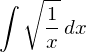

In [37]:
the_integral = Integral(sqrt(1/x), x)
the_integral

In [38]:
str(the_integral)

'Integral(sqrt(1/x), x)'

In [39]:
srepr(the_integral)

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

In [40]:
# 生成Latex公式
print(latex(the_integral))

\int \sqrt{\frac{1}{x}}\, dx


In [2]:
# Graphviz
from sympy.printing.dot import dotprint
from sympy.abc import x
print(dotprint(x+2))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Integer(2), Symbol(x))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Integer(2)_(0,)" ["color"="black", "label"="2", "shape"="ellipse"];
"Symbol(x)_(1,)" ["color"="black", "label"="x", "shape"="ellipse"];

#########
# Edges #
#########

"Add(Integer(2), Symbol(x))_()" -> "Integer(2)_(0,)";
"Add(Integer(2), Symbol(x))_()" -> "Symbol(x)_(1,)";
}
